# Data Storytelling
## Oregon Wholesale cannabis data
A look at the data available from Oregon with the objective of looking at price trends.

In [175]:
import os
import pandas as pd
import datetime as dt
import re
from pathlib import Path
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv(r"C:\Users\micha\Documents\Springboard\Cannabis\OR_median wholesale_Full Data_data.csv")
#df_MA = pd.read_csv(r"C:\Users\micha\Documents\Springboard\MA_price_g.csv")
#df_IL = pd.read_csv(r"C:\Users\micha\Documents\Springboard\Cannabis\ILLINOIS\Product Sales_data.csv")

In [177]:
df.head()

,Date,Unique Line,Price Selector,Product Type,ReceiverFacilityType,Shipper Producer Type,ShipperFacilityType,Month,Month Year,Tooltip Date,Uom,Year,Median Wholesale Price
0,1/1/2018,Recreational Wholesaler (Non-Producer) to Recr...,0,Extract/Concentrate,Recreational Processor,Non-Producer,Recreational Wholesaler,1,1/1/2018,January 2018,lb,2018,11339.861310
1,1/1/2019,Recreational Wholesaler (Non-Producer) to Recr...,0,Extract/Concentrate,Recreational Wholesaler,Non-Producer,Recreational Wholesaler,1,1/1/2019,January 2019,lb,2019,5669.914582
2,1/1/2020,Recreational Wholesaler (Non-Producer) to Recr...,0,Extract/Concentrate,Recreational Processor,Non-Producer,Recreational Wholesaler,1,1/1/2020,January 2020,lb,2020,6803.890266
3,2/1/2018,Recreational Wholesaler (Non-Producer) to Recr...,0,Extract/Concentrate,Recreational Wholesaler,Non-Producer,Recreational Wholesaler,2,2/1/2018,February 2018,lb,2018,10886.230850
4,2/1/2019,Recreational Processor (Non-Producer) to Recre...,0,Extract/Concentrate,Recreational Wholesaler,Non-Producer,Recreational Processor,2,2/1/2019,February 2019,lb,2019,4535.924376


Looks like we have some data on wholesale transactions aggregated by month.

The numerical features are the median price, month and year which are handy for grouping. The price selector is all zeros so it has no real value.

In [178]:
df.describe()

,Price Selector,Month,Year,Median Wholesale Price
count,1900.0,1900.000000,1900.000000,1900.000000
mean,0.0,6.377895,2019.821053,2239.273614
std,0.0,3.442958,1.979510,2895.703379
min,0.0,1.000000,2016.000000,0.009883
25%,0.0,3.000000,2018.000000,349.266145
50%,0.0,6.000000,2020.000000,999.102806
75%,0.0,9.000000,2022.000000,3968.951460
max,0.0,12.000000,2023.000000,18143.726670


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1900 non-null   object 
 1   Unique Line             1892 non-null   object 
 2   Price Selector          1900 non-null   int64  
 3   Product Type            1900 non-null   object 
 4   ReceiverFacilityType    1900 non-null   object 
 5   Shipper Producer Type   1892 non-null   object 
 6   ShipperFacilityType     1900 non-null   object 
 7   Month                   1900 non-null   int64  
 8   Month Year              1900 non-null   object 
 9   Tooltip Date            1900 non-null   object 
 10  Uom                     1900 non-null   object 
 11  Year                    1900 non-null   int64  
 12  Median Wholesale Price  1900 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 193.1+ KB


The data covers the years 2017 through Sept. 2022

In [180]:
df.Date.min(), df.Date.max()

('1/1/2017', '9/1/2022')

In [181]:
df['Unique Line'].unique()

array(['Recreational Wholesaler (Non-Producer) to Recreational Processor of Extract/Concentrate ($ per lb)',
       'Recreational Wholesaler (Non-Producer) to Recreational Wholesaler of Extract/Concentrate ($ per lb)',
       'Recreational Processor (Non-Producer) to Recreational Wholesaler of Extract/Concentrate ($ per lb)',
       'Recreational Wholesaler (Non-Producer) to Recreational Retailer of Extract/Concentrate ($ per lb)',
       'Recreational Processor (Non-Producer) to Recreational Retailer of Extract/Concentrate ($ per lb)',
       'Recreational Processor (Non-Producer) to Recreational Processor of Extract/Concentrate ($ per lb)',
       'Total (Non-Producer) to Recreational Retailer of Extract/Concentrate ($ per lb)',
       'Recreational Producer (Mixed) to Recreational Retailer of Usable MJ ($ per lb)',
       'Recreational Producer (Outdoor) to Recreational Wholesaler of Usable MJ ($ per lb)',
       'Recreational Wholesaler (Non-Producer) to Recreational Processor of U

`Unique Line`  represents a shipper to receiver relationship and contains much of the other data.

`ReceiverFacilityType` contains the 3 potential receivers: 'Recreational Processor', 'Recreational Wholesaler', and     'Recreational Retailer'

In [182]:
df['ReceiverFacilityType'].unique()

array(['Recreational Processor', 'Recreational Wholesaler',
       'Recreational Retailer'], dtype=object)

`ShipperFacilityType` similarly has the 5 potential shippers: 'Recreational Wholesaler', 'Recreational Processor', 'Total',
       'Recreational Producer', and 'Recreational Retailer'

In [183]:
df['ShipperFacilityType'].unique()

array(['Recreational Wholesaler', 'Recreational Processor', 'Total',
       'Recreational Producer', 'Recreational Retailer'], dtype=object)

In [184]:
df[df['Unique Line'].isnull()]

,Date,Unique Line,Price Selector,Product Type,ReceiverFacilityType,Shipper Producer Type,ShipperFacilityType,Month,Month Year,Tooltip Date,Uom,Year,Median Wholesale Price
1019,10/1/2020,NaN,0,Usable MJ,Recreational Processor,NaN,Recreational Producer,10,10/1/2020,October 2020,lb,2020,280.325894
1310,5/1/2020,NaN,0,Usable MJ,Recreational Retailer,NaN,Recreational Producer,5,5/1/2020,May 2020,lb,2020,544.313137
1311,6/1/2020,NaN,0,Usable MJ,Recreational Retailer,NaN,Recreational Producer,6,6/1/2020,June 2020,lb,2020,200.000000
1312,7/1/2020,NaN,0,Usable MJ,Recreational Retailer,NaN,Recreational Producer,7,7/1/2020,July 2020,lb,2020,200.000000
1313,8/1/2020,NaN,0,Usable MJ,Recreational Retailer,NaN,Recreational Producer,8,8/1/2020,August 2020,lb,2020,200.000000
1314,9/1/2020,NaN,0,Usable MJ,Recreational Retailer,NaN,Recreational Producer,9,9/1/2020,September 2020,lb,2020,200.000000
1315,10/1/2020,NaN,0,Usable MJ,Recreational Retailer,NaN,Recreational Producer,10,10/1/2020,October 2020,lb,2020,201.248352
1316,12/1/2020,NaN,0,Usable MJ,Recreational Retailer,NaN,Recreational Producer,12,12/1/2020,December 2020,lb,2020,250.000000


Drop these

In [185]:
df.dropna(inplace=True)

In [186]:
df['Product Type'].unique()

array(['Extract/Concentrate', 'Usable MJ'], dtype=object)

There are two product types so let's separate into `df_ex` for Extracts and `df_fl` for Usabale MJ, dropping the extranious features of `Price Selector` and `Uom`

In [187]:
df_ex = df[df['Product Type'] == 'Extract/Concentrate'].drop(columns=['Price Selector', 'Uom'])
df_fl = df[df['Product Type'] == 'Usable MJ'].drop(columns=['Price Selector', 'Uom'])

In [188]:
def make_hist_year(df, column):
    '''This will make groupby tables and histograms by year for the unique column names in df '''
    i = 0
    for line in df[column].unique():
        i+=1
        data = df[df[column]==line].dropna()
        print(line, '\n')
        print(data.groupby(by=['Year'])['Median Wholesale Price'].mean(), '\n')
        data.groupby(by=['Year'])['Median Wholesale Price'].mean().plot.bar()
        plt.title(line)
        plt.savefig("fig" + column + str(i) + ".jpg")
        plt.show()

In [189]:
def make_hist_month(df, column):
    '''This will make groupby tables and histograms by year and month for the unique column names in df '''
    i = 0
    for line in df[column].unique():
        i+=1
        data = df[df[column]==line].dropna()
        print(line, '\n')
        table = data.groupby(by=['Year', 'Month'])['Median Wholesale Price'].mean()
        
        data.groupby(by=['Year','Month'])['Median Wholesale Price'].mean().plot.bar()
        plt.title(line)
        plt.xticks([])
        plt.savefig("fig" + column + str(i) + "monthly.jpg")
        plt.show()
        print(data.groupby(by=['Year', 'Month'])['Median Wholesale Price'].mean(), '\n')

## Extracts 

The overall median price of extract appears below.

Prices dropped overall from their initial high with some seasonal variation but also seem to be currently climbing slightly.

Generally, prices in the last few years have stayed steady in the $ \$4000 - \$6000 $ per pound range.

In [190]:
#df_ex.info()

Extract/Concentrate 



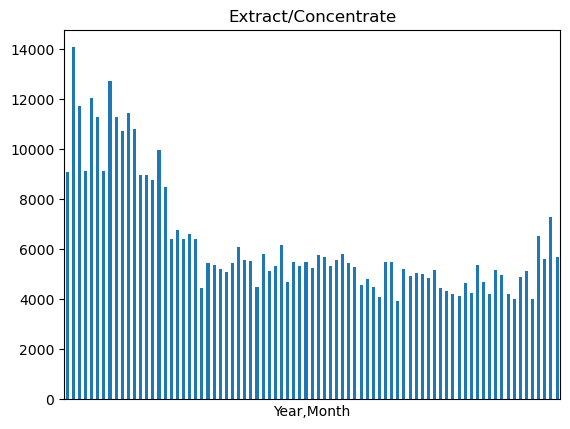

Year  Month
2016  12        9071.850841
2017  1        14061.370544
      2        11717.812218
      3         9136.664125
      4        12027.703795
                   ...     
2023  4         4031.686433
      5         6512.298566
      6         5624.555333
      7         7291.184110
      8         5688.061157
Name: Median Wholesale Price, Length: 81, dtype: float64 



In [191]:
make_hist_month(df_ex, 'Product Type')

Extract/Concentrate 

Year
2016     9071.850841
2017    10979.026831
2018     7029.048719
2019     5361.675362
2020     5414.437111
2021     4880.276607
2022     4546.889777
2023     5416.490374
Name: Median Wholesale Price, dtype: float64 



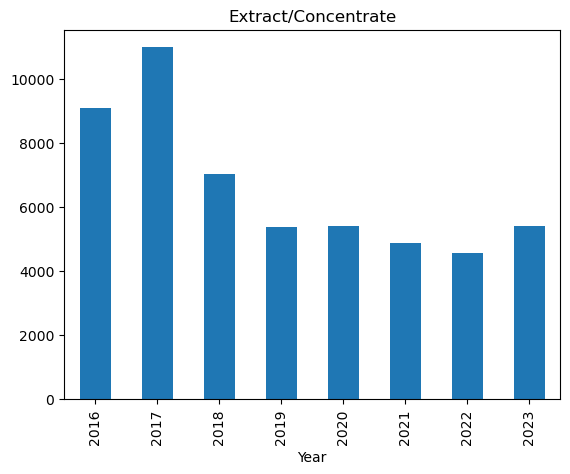

In [192]:
make_hist_year(df_ex, 'Product Type')

Now let's look at the different transation type pricing.

Recreational Wholesaler (Non-Producer) to Recreational Processor of Extract/Concentrate ($ per lb) 

Year
2017    11488.002362
2018     7549.111606
2019     5533.271560
2020     4788.425367
2021     4334.265056
2022     4791.082046
2023     7779.124620
Name: Median Wholesale Price, dtype: float64 



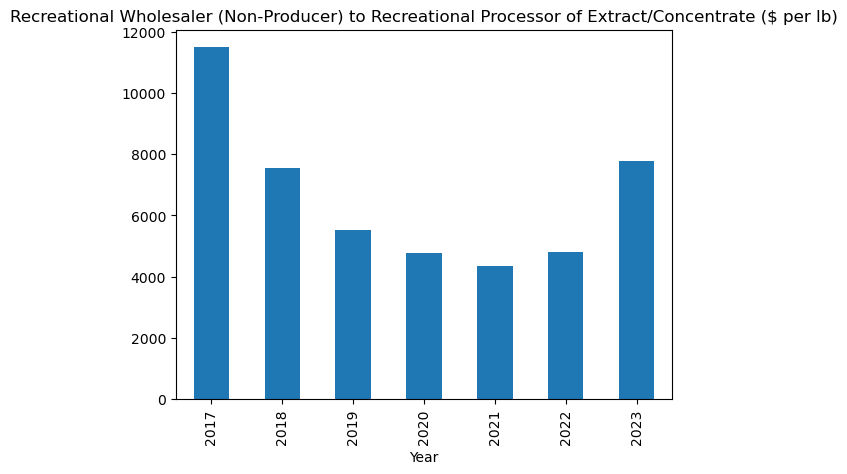

Recreational Wholesaler (Non-Producer) to Recreational Wholesaler of Extract/Concentrate ($ per lb) 

Year
2016     9071.851270
2017    10394.832461
2018     8043.715424
2019     6361.636018
2020     5207.583065
2021     4656.887848
2022     4167.329733
2023     4248.461009
Name: Median Wholesale Price, dtype: float64 



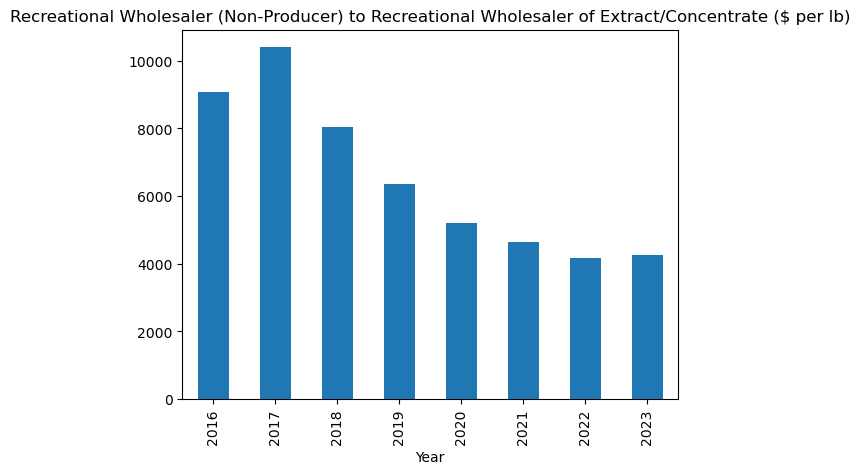

Recreational Processor (Non-Producer) to Recreational Wholesaler of Extract/Concentrate ($ per lb) 

Year
2017    11886.657330
2018     6803.918469
2019     4895.020630
2020     5496.659572
2021     5095.362354
2022     4862.895367
2023     4567.115127
Name: Median Wholesale Price, dtype: float64 



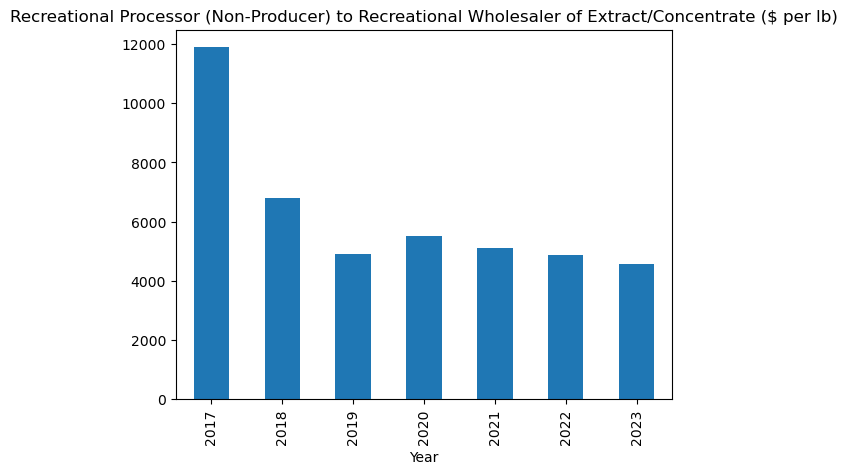

Recreational Wholesaler (Non-Producer) to Recreational Retailer of Extract/Concentrate ($ per lb) 

Year
2016     9071.850626
2017    11680.028950
2018     8656.066221
2019     6270.922980
2020     5341.809480
2021     5407.205424
2022     4649.328680
2023     4184.399020
Name: Median Wholesale Price, dtype: float64 



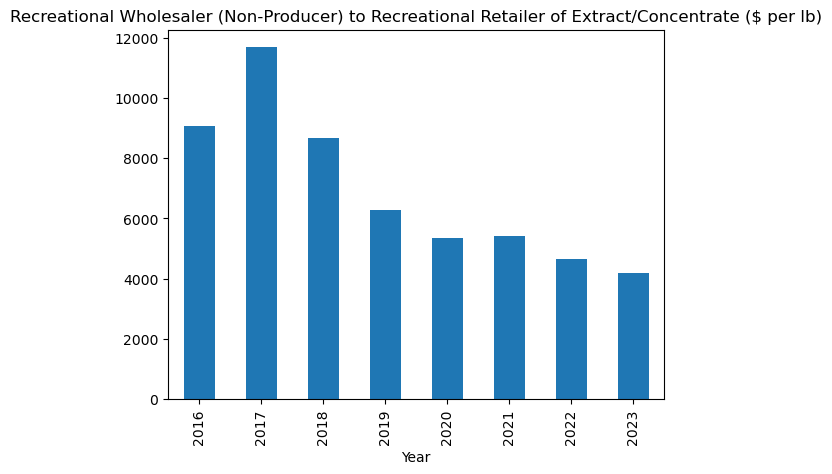

Recreational Processor (Non-Producer) to Recreational Retailer of Extract/Concentrate ($ per lb) 

Year
2017    10818.206228
2018     5121.819794
2019     4535.931845
2020     5008.424343
2021     5159.619163
2022     4946.055865
2023     5187.972767
Name: Median Wholesale Price, dtype: float64 



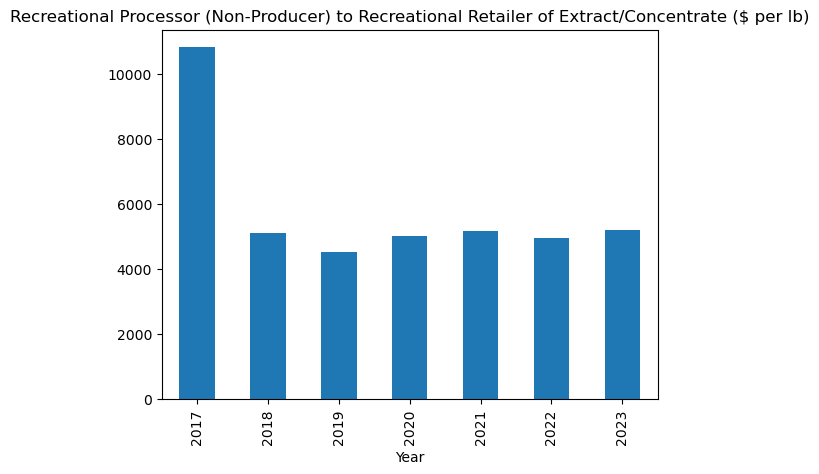

Recreational Processor (Non-Producer) to Recreational Processor of Extract/Concentrate ($ per lb) 

Year
2017    4233.545674
2018    3905.664426
2019     304.555042
2020    6996.675478
2021    4133.379390
2022    3614.997465
2023    8035.083122
Name: Median Wholesale Price, dtype: float64 



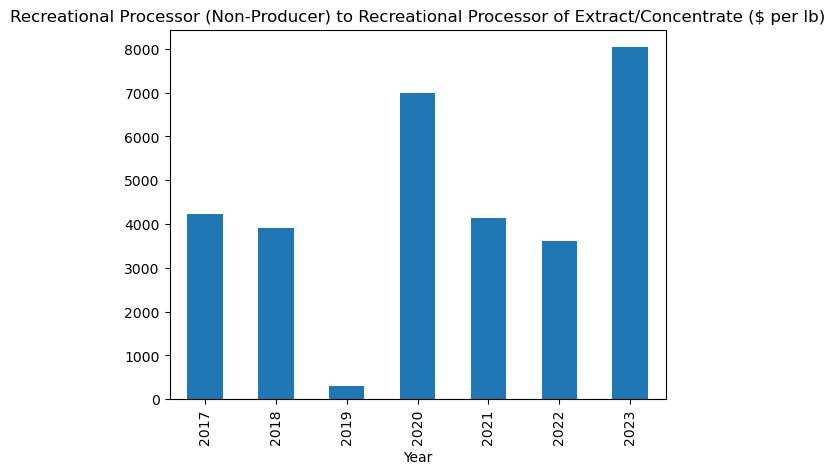

Total (Non-Producer) to Recreational Retailer of Extract/Concentrate ($ per lb) 

Year
2016     9071.850626
2017    11377.633198
2018     7257.481765
2019     5051.894566
2020     5220.853575
2021     5329.716050
2022     4718.881592
2023     4535.930327
Name: Median Wholesale Price, dtype: float64 



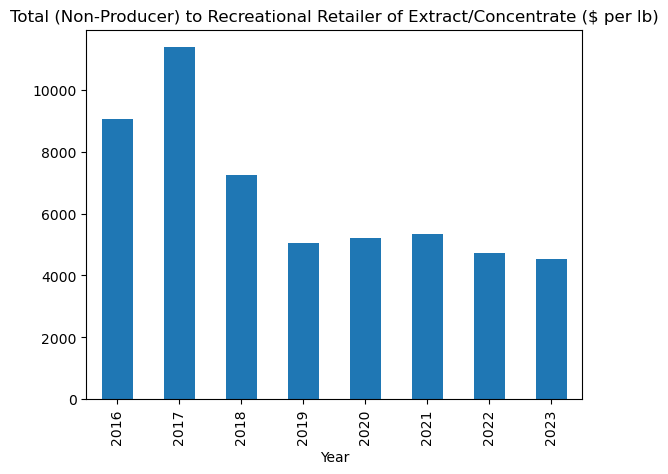

In [193]:
make_hist_year(df_ex, 'Unique Line')

From the breakdown in transation types we see that most of the recent uptick in overall price is in two categories, `Recreational Wholesaler (Non-Producer) to Recreational Processor of Extract/Concentrate ($ per lb)` and `Recreational Processor (Non-Producer) to Recreational Processor of Extract/Concentrate ($ per lb)` in both cases the Processors are paying more. 

Aside: I believe some of the data in 2019 may also be in ounces instead of pounds.

The best explanation, which the monthly data below confirms, is that non-producing Recreational Processors are being squeezed out by the extract producers with greater vertical integration.

Recreational Wholesaler (Non-Producer) to Recreational Processor of Extract/Concentrate ($ per lb) 



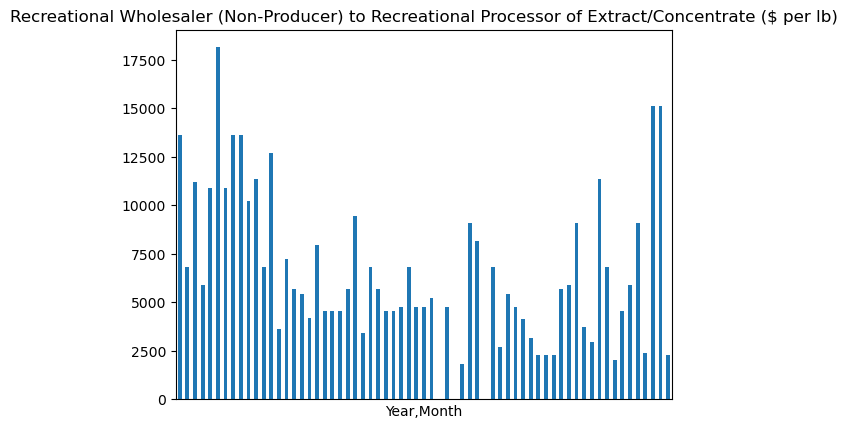

Year  Month
2017  2        13607.775710
      3         6803.887395
      4        11233.605180
      5         5896.702410
      6        10886.225710
                   ...     
2023  3         9071.863332
      4         2381.360749
      5        15149.994846
      7        15149.996525
      8         2267.962618
Name: Median Wholesale Price, Length: 65, dtype: float64 

Recreational Wholesaler (Non-Producer) to Recreational Wholesaler of Extract/Concentrate ($ per lb) 



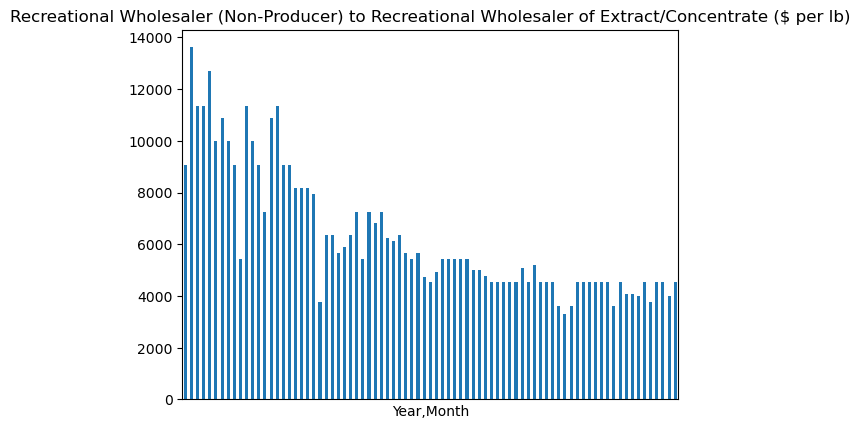

Year  Month
2016  12        9071.851270
2017  1        13607.771850
      2        11339.813090
      3        11339.813090
      4        12700.590660
                   ...     
2023  4         3778.424651
      5         4535.923951
      6         4535.925237
      7         3991.614208
      8         4535.923951
Name: Median Wholesale Price, Length: 81, dtype: float64 

Recreational Processor (Non-Producer) to Recreational Wholesaler of Extract/Concentrate ($ per lb) 



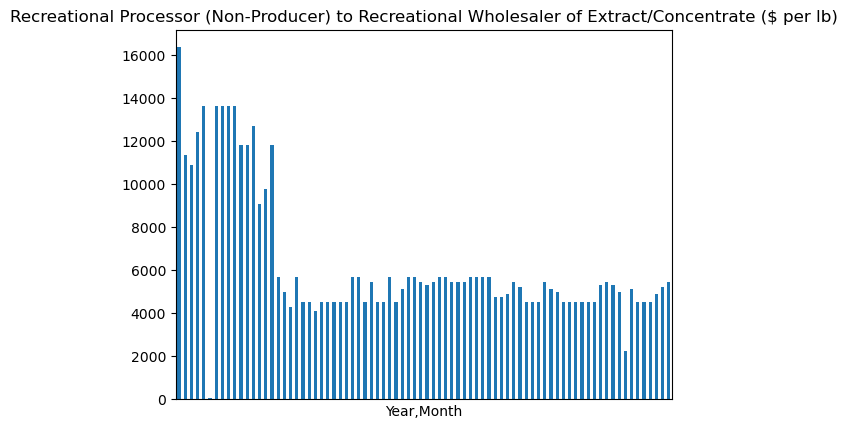

Year  Month
2017  1        16329.338560
      2        11339.813090
      3        10886.225710
      4        12398.201500
      5        13607.782140
                   ...     
2023  4         4535.931666
      5         4535.944525
      6         4898.806199
      7         5216.312543
      8         5443.110284
Name: Median Wholesale Price, Length: 80, dtype: float64 

Recreational Wholesaler (Non-Producer) to Recreational Retailer of Extract/Concentrate ($ per lb) 



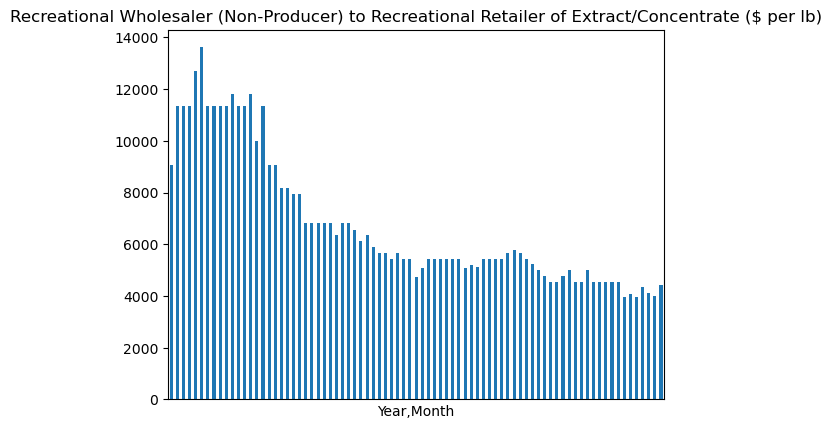

Year  Month
2016  12        9071.850626
2017  1        11339.813090
      2        11339.813090
      3        11339.829160
      4        12700.590660
                   ...     
2023  4         3968.951460
      5         4354.500572
      6         4127.697816
      7         4000.691730
      8         4436.141170
Name: Median Wholesale Price, Length: 81, dtype: float64 

Recreational Processor (Non-Producer) to Recreational Retailer of Extract/Concentrate ($ per lb) 



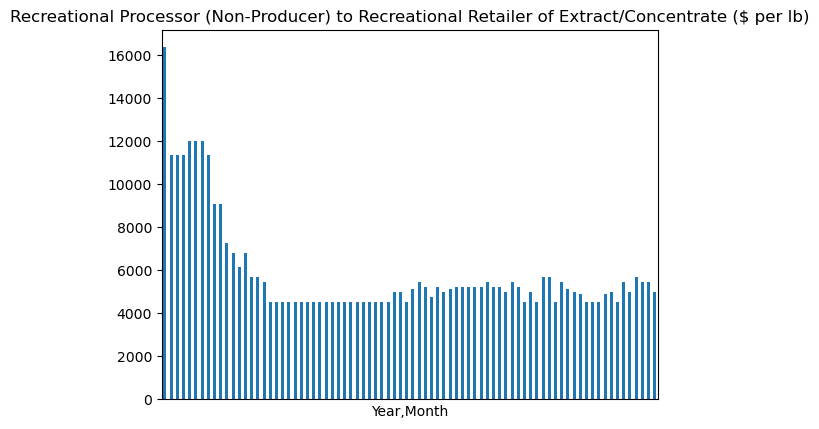

Year  Month
2017  1        16329.338560
      2        11339.845240
      3        11339.829160
      4        11339.829160
      5        11974.870920
                   ...     
2023  4         4989.524833
      5         5669.906546
      6         5443.117999
      7         5443.133430
      8         4989.524833
Name: Median Wholesale Price, Length: 80, dtype: float64 

Recreational Processor (Non-Producer) to Recreational Processor of Extract/Concentrate ($ per lb) 



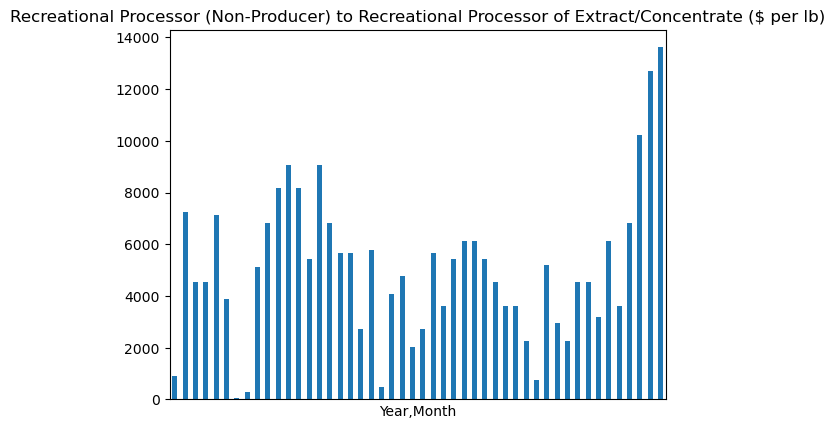

Year  Month
2017  3          907.235201
      6         7257.478094
      12        4535.923726
2018  1         4535.923950
      4         7134.713150
      5         3889.456085
      10          62.564520
2019  7          304.555042
2020  2         5102.914814
      3         6803.897499
      4         8164.676998
      5         9071.889051
      6         8164.676998
      7         5443.118000
      9         9071.854760
      10        6803.897499
      11        5669.914582
      12        5669.914582
2021  1         2721.555142
      2         5783.460437
      3          498.952483
      4         4082.338500
      5         4762.728249
      6         2041.165778
      7         2721.555142
      8         5669.914583
      9         3628.745333
      10        5443.117999
      11        6123.516108
      12        6123.502927
2022  1         5443.117999
      2         4535.931666
      3         3628.745333
      4         3628.745333
      5         2267.965833
      6 

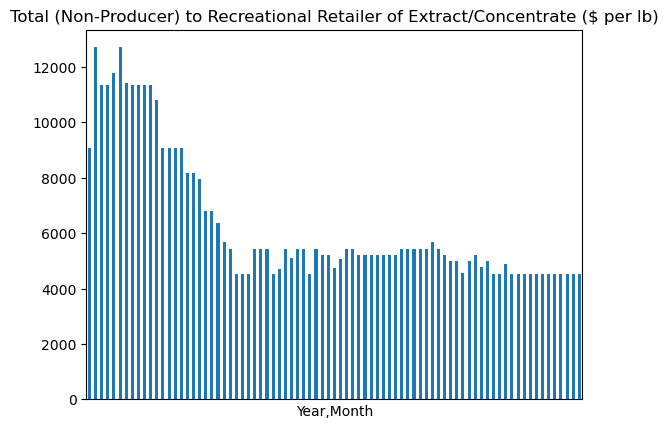

Year  Month
2016  12        9071.850626
2017  1        12700.590660
      2        11339.813090
      3        11339.829160
      4        11793.405610
                   ...     
2023  4         4535.925237
      5         4535.931666
      6         4535.931666
      7         4535.931666
      8         4535.931666
Name: Median Wholesale Price, Length: 81, dtype: float64 



In [194]:
make_hist_month(df_ex, 'Unique Line')

## Usable MJ

Usable MJ 

Year
2016    1316.022454
2017    1485.118065
2018     702.433706
2019     700.214408
2020     931.316290
2021     795.694667
2022     667.508764
2023     836.864733
Name: Median Wholesale Price, dtype: float64 



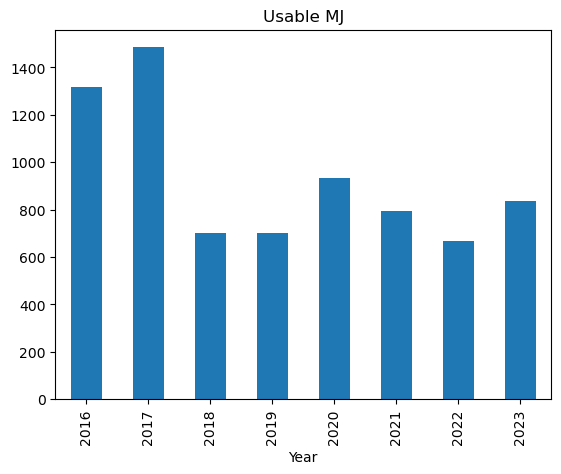

In [195]:
make_hist_year(df_fl[df_fl['ReceiverFacilityType'] == 'Recreational Wholesaler' ], 'Product Type')

Processor's Prices
Usable MJ 

Year
2016    245.899160
2017    420.179618
2018    157.796775
2019    163.456873
2020    157.267807
2021    152.305541
2022    102.615385
2023    153.606418
Name: Median Wholesale Price, dtype: float64 



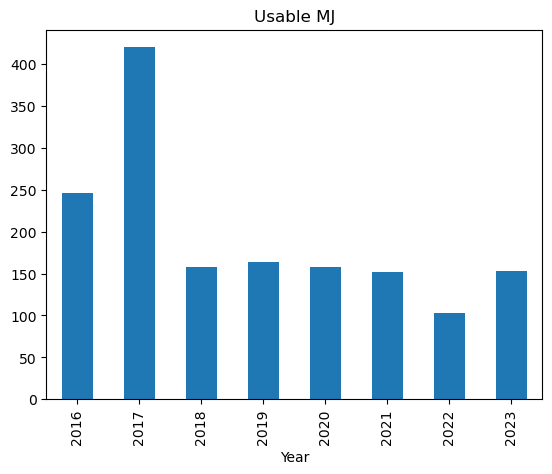

In [196]:
print("Processor's Prices")
make_hist_year(df_fl[df_fl['ReceiverFacilityType'] == 'Recreational Processor' ], 'Product Type')

Retailer's prices
Usable MJ 

Year
2016    1721.219415
2017    1836.475740
2018     908.771382
2019     962.400210
2020    1206.354625
2021    1150.640852
2022     801.171022
2023     767.960281
Name: Median Wholesale Price, dtype: float64 



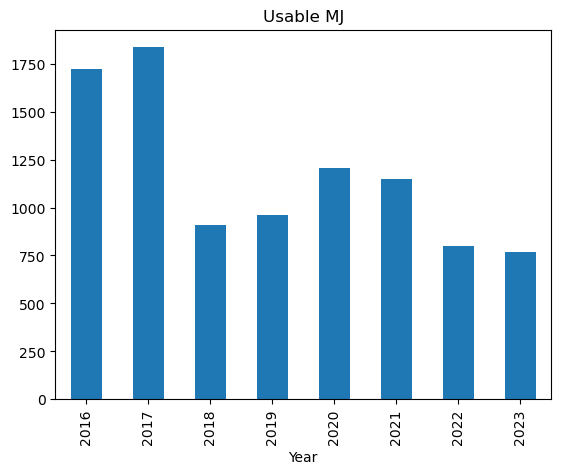

In [197]:
print("Retailer's prices")
make_hist_year(df_fl[df_fl['ReceiverFacilityType'] == 'Recreational Retailer' ], 'Product Type')

### Look at retailers first

Recreational Producer (Mixed) to Recreational Retailer of Usable MJ ($ per lb) 

Year
2016    1593.662408
2017    1758.640295
2018    1114.562739
2019    1124.695669
2020    1284.203386
2021    1269.994194
2022     968.370648
2023     967.815515
Name: Median Wholesale Price, dtype: float64 



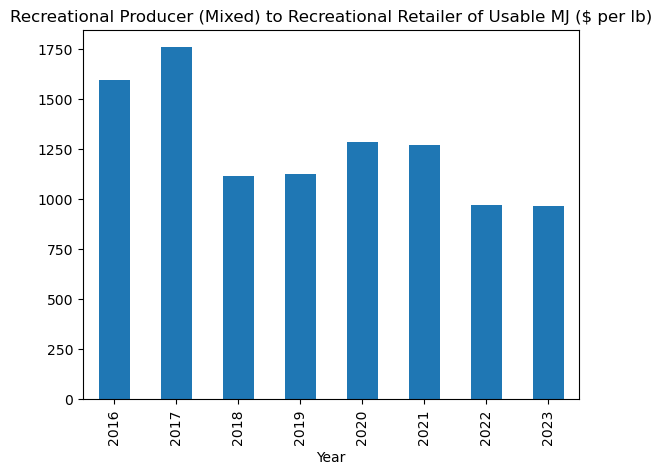

Recreational Wholesaler (Non-Producer) to Recreational Retailer of Usable MJ ($ per lb) 

Year
2016    1763.608692
2017    1639.340888
2018     798.256122
2019     850.794919
2020    1067.956804
2021     951.407045
2022     495.832610
2023     478.034927
Name: Median Wholesale Price, dtype: float64 



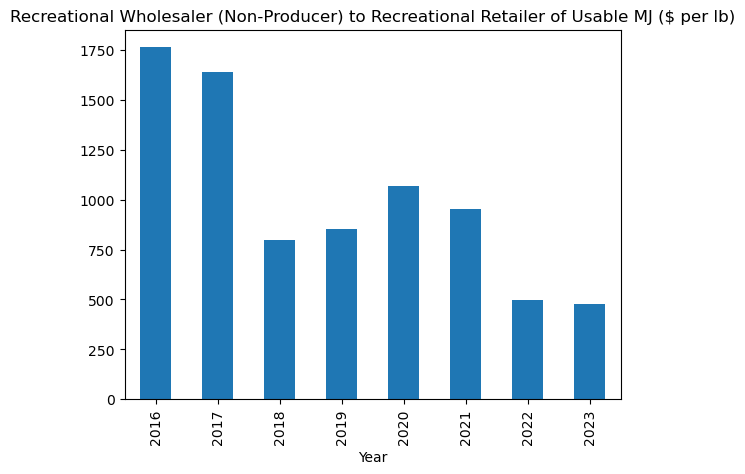

Recreational Processor (Non-Producer) to Recreational Retailer of Usable MJ ($ per lb) 

Year
2017    2373.758229
2018     591.838921
2019     920.846204
2020     922.741787
2021     115.879258
2022     698.198813
2023     550.675565
Name: Median Wholesale Price, dtype: float64 



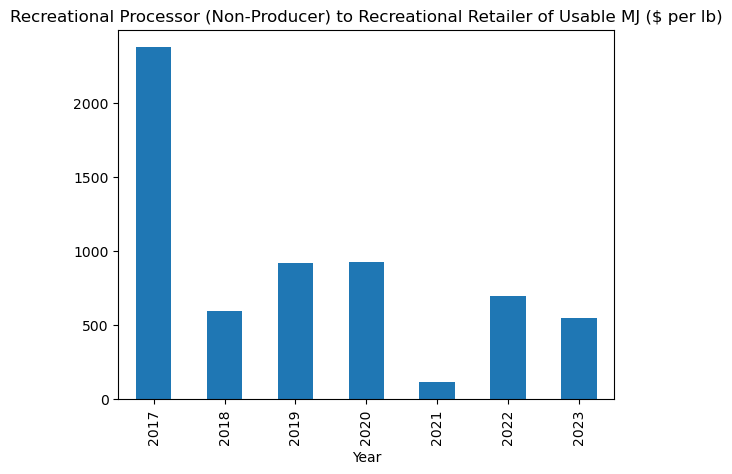

Recreational Producer (Indoor) to Recreational Retailer of Usable MJ ($ per lb) 

Year
2016    1954.385571
2017    2138.591871
2018    1241.818570
2019    1207.393131
2020    1565.555213
2021    1624.978141
2022    1235.697283
2023    1225.633062
Name: Median Wholesale Price, dtype: float64 



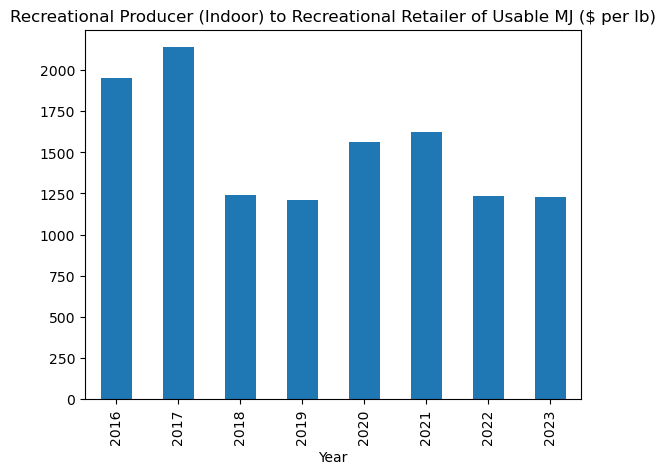

Recreational Producer (Outdoor) to Recreational Retailer of Usable MJ ($ per lb) 

Year
2016    1520.094336
2017    1400.725773
2018     597.298793
2019     608.982618
2020     884.047966
2021     778.183865
2022     424.150436
2023     399.641122
Name: Median Wholesale Price, dtype: float64 



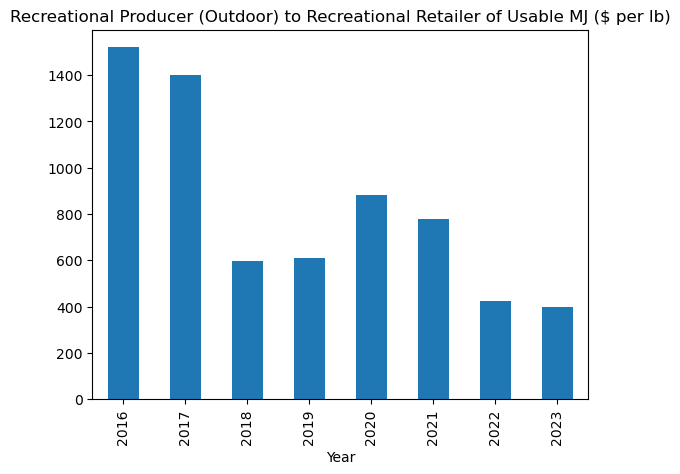

Recreational Producer (Total) to Recreational Retailer of Usable MJ ($ per lb) 

Year
2016    1728.106343
2017    1818.469982
2018    1098.960354
2019    1100.750949
2020    1426.388085
2021    1457.177000
2022    1082.253379
2023    1092.709140
Name: Median Wholesale Price, dtype: float64 



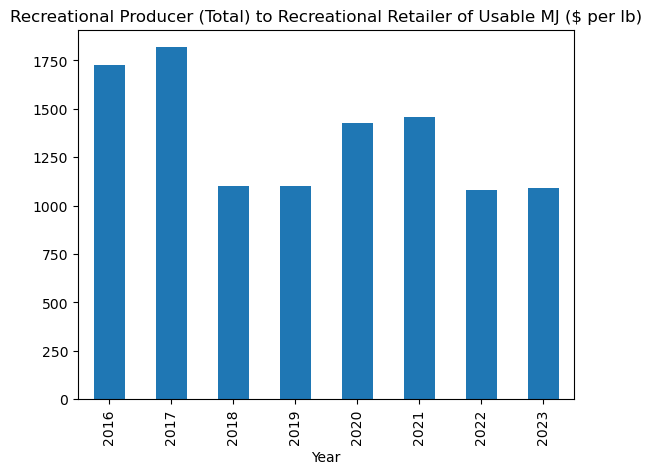

Total (Total) to Recreational Retailer of Usable MJ ($ per lb) 

Year
2016    1724.940140
2017    1725.803139
2018     918.664172
2019     919.875146
2020    1199.051520
2021    1167.025397
2022     695.112967
2023     606.891455
Name: Median Wholesale Price, dtype: float64 



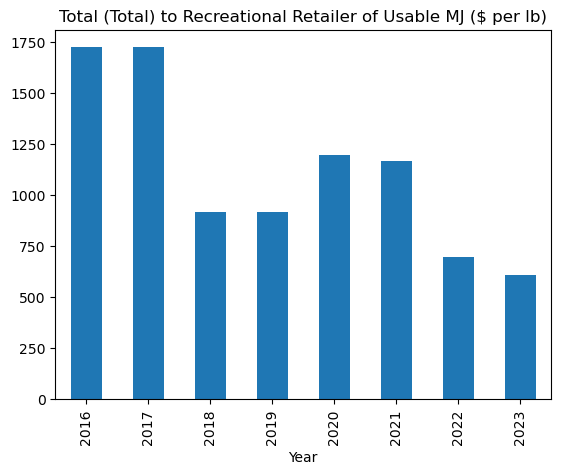

In [198]:
make_hist_year(df_fl[df_fl['ReceiverFacilityType'] == 'Recreational Retailer' ], 'Unique Line')

It is clear that although there was a bump in prices for retailer's during Covid the general trend continues to be downward, driven primarily by outdoor sales.

### Processors next

Recreational Wholesaler (Non-Producer) to Recreational Processor of Usable MJ ($ per lb) 

Year
2016    800.000000
2017    450.032956
2018    151.937982
2019    367.744591
2020    140.877421
2021     96.114394
2022     44.332909
2023     31.228851
Name: Median Wholesale Price, dtype: float64 



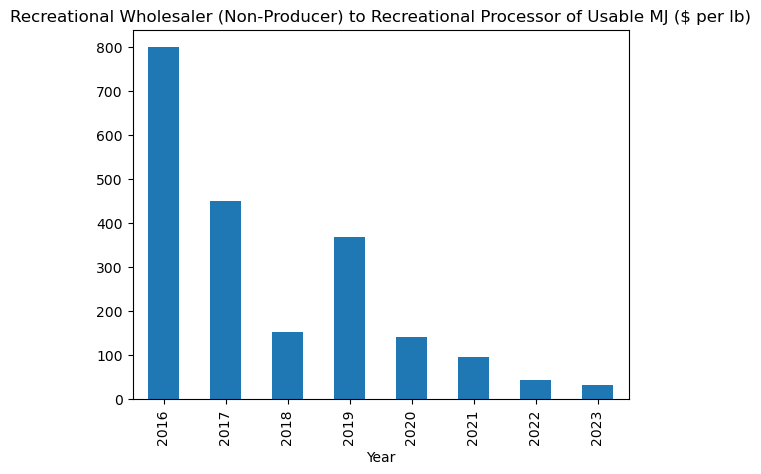

Recreational Producer (Indoor) to Recreational Processor of Usable MJ ($ per lb) 

Year
2017    263.335314
2018    144.138278
2019     79.957789
2020    132.784790
2021    225.668434
2022    178.022899
2023    268.726747
Name: Median Wholesale Price, dtype: float64 



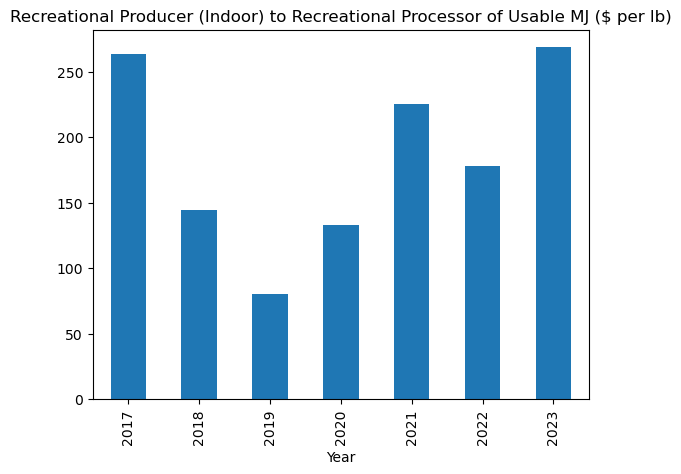

Recreational Producer (Outdoor) to Recreational Processor of Usable MJ ($ per lb) 

Year
2016    107.373950
2017    245.906968
2018    244.537338
2019    178.621472
2020     66.758471
2021     84.244152
2022     86.183155
2023     63.875540
Name: Median Wholesale Price, dtype: float64 



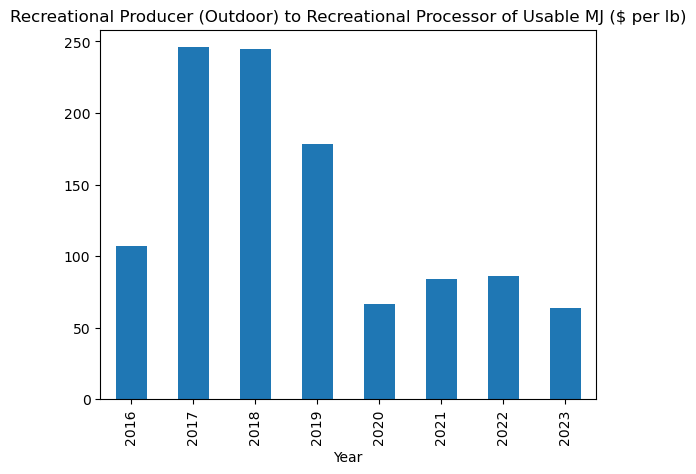

Recreational Producer (Mixed) to Recreational Processor of Usable MJ ($ per lb) 

Year
2017    233.959781
2018    111.364152
2019    139.929502
2020     97.290081
2021     75.888193
2022     82.817644
2023    260.674504
Name: Median Wholesale Price, dtype: float64 



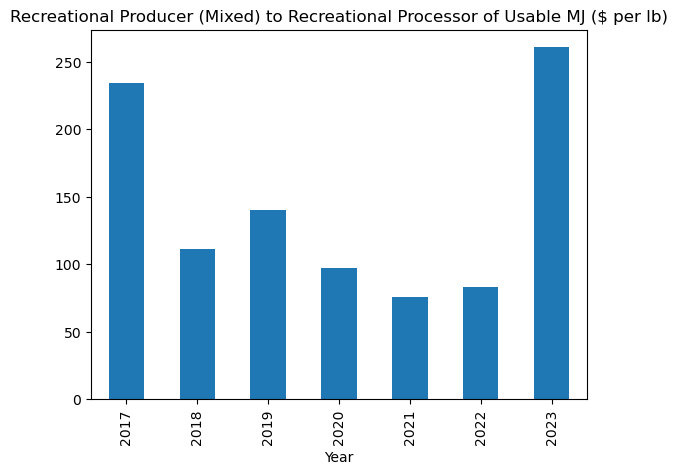

Recreational Processor (Non-Producer) to Recreational Processor of Usable MJ ($ per lb) 

Year
2017    7711.072848
2018     149.871750
2019      55.064152
2020     177.527593
2021      54.655906
2022      81.165843
2023      78.310863
Name: Median Wholesale Price, dtype: float64 



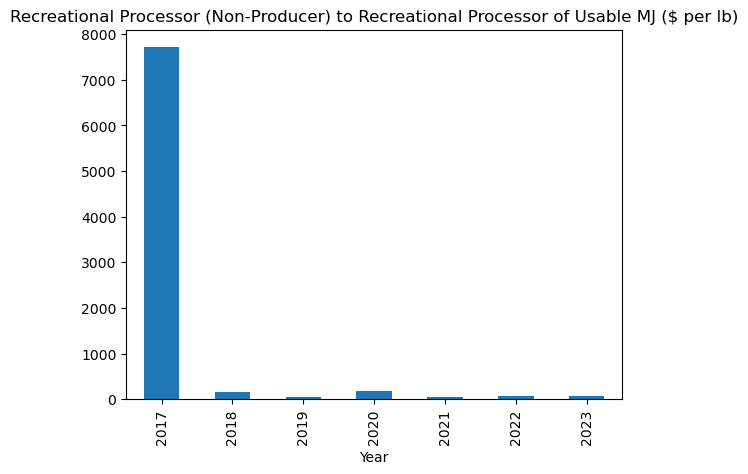

Recreational Producer (Total) to Recreational Processor of Usable MJ ($ per lb) 

Year
2016    107.373950
2017    271.499956
2018    138.326966
2019     87.161917
2020    104.147232
2021    127.025197
2022    109.012267
2023    211.531682
Name: Median Wholesale Price, dtype: float64 



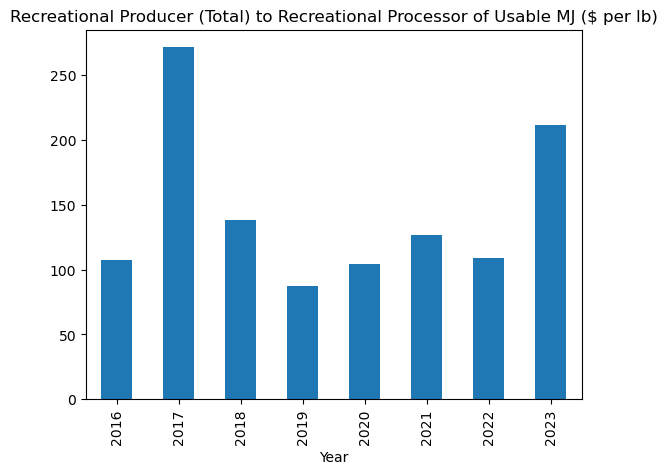

Recreational Retailer (Non-Producer) to Recreational Processor of Usable MJ ($ per lb) 

Year
2020    1543.114906
2021    1360.778461
2022     237.504861
2023      17.814837
Name: Median Wholesale Price, dtype: float64 



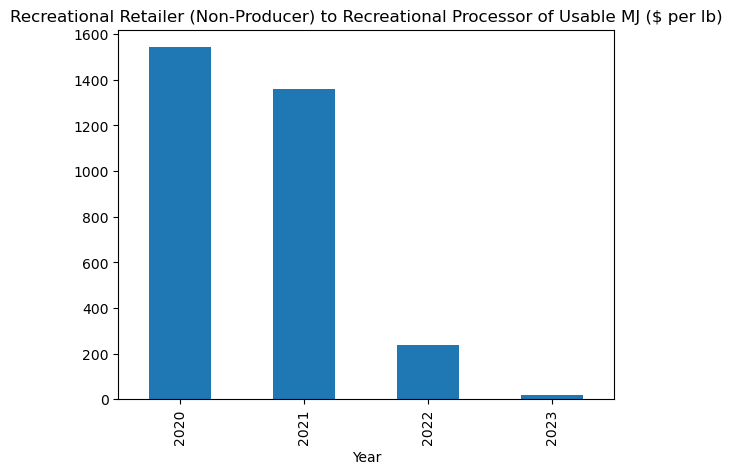

In [199]:
make_hist_year(df_fl[df_fl['ReceiverFacilityType'] == 'Recreational Processor' ], 'Unique Line')

While processor prices overall appear stable this is actually misleading as indoor and outdoor prices are moving in opposite directions. This is making prices appear stable when in fact indoor prices are near their early peak and outdoor prices are dropping quickly. 

A possible explanation may be that less indoor product is being sent out to processors at lower prices due to better trimming and premium pricing of top quality flower.

### Finally the wholesalers

Recreational Producer (Outdoor) to Recreational Wholesaler of Usable MJ ($ per lb) 

Year
2016     753.624020
2017    1003.926296
2018     450.125540
2019     502.693017
2020     665.940238
2021     580.532931
2022     330.677787
2023     433.985281
Name: Median Wholesale Price, dtype: float64 



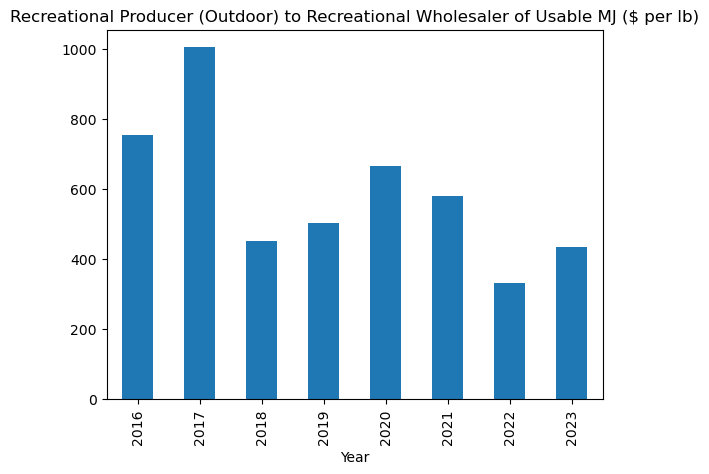

Recreational Producer (Mixed) to Recreational Wholesaler of Usable MJ ($ per lb) 

Year
2016    1904.824089
2017    1466.286721
2018     803.579203
2019     795.312877
2020     786.489943
2021     529.226564
2022     637.691456
2023     749.963950
Name: Median Wholesale Price, dtype: float64 



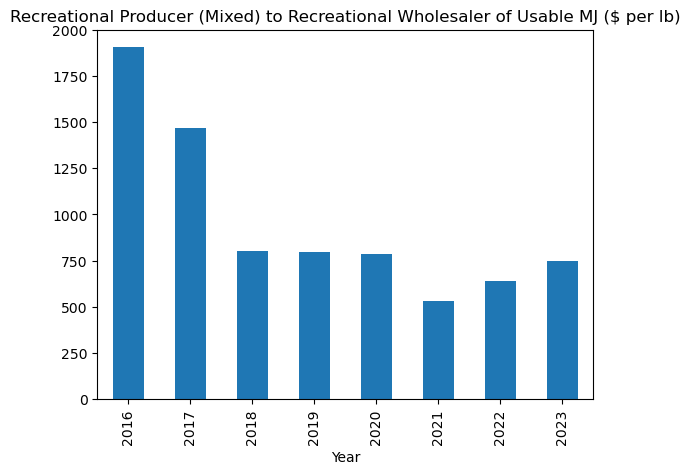

Recreational Processor (Non-Producer) to Recreational Wholesaler of Usable MJ ($ per lb) 

Year
2017    1765.018457
2018     461.360082
2019     367.104070
2020     464.116264
2021     221.482512
2022     366.376887
2023    1031.634380
Name: Median Wholesale Price, dtype: float64 



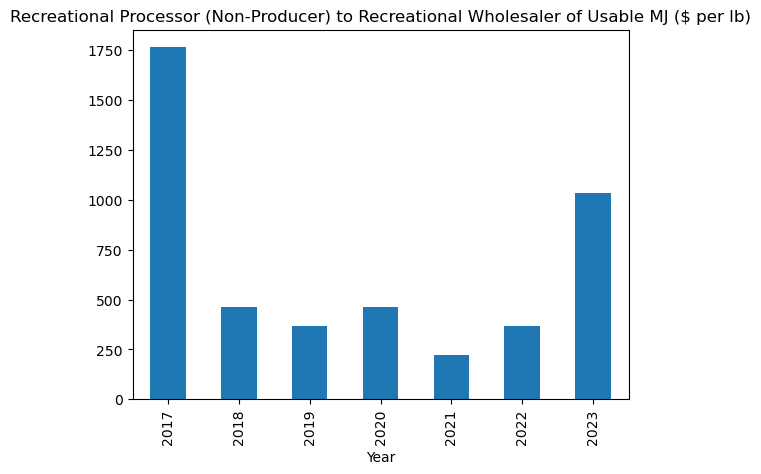

Recreational Producer (Indoor) to Recreational Wholesaler of Usable MJ ($ per lb) 

Year
2016    2113.111573
2017    2006.532919
2018     986.102435
2019     950.147228
2020    1365.846873
2021    1339.478934
2022     993.413802
2023    1111.234559
Name: Median Wholesale Price, dtype: float64 



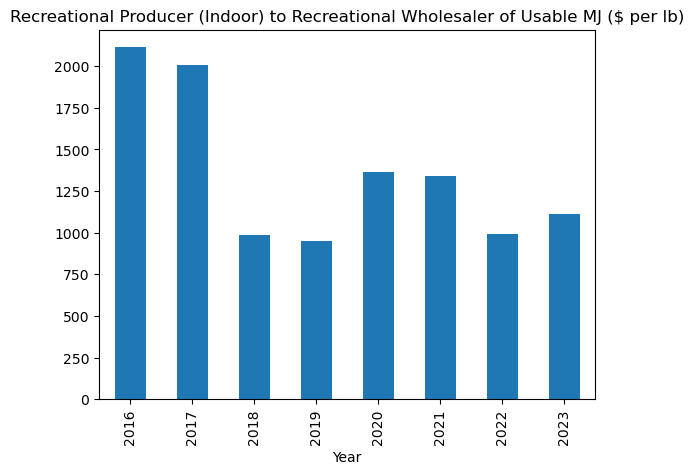

Recreational Producer (Total) to Recreational Wholesaler of Usable MJ ($ per lb) 

Year
2016     758.226508
2017    1323.776129
2018     690.464459
2019     747.018875
2020    1140.588120
2021    1116.348342
2022     858.817948
2023     906.197904
Name: Median Wholesale Price, dtype: float64 



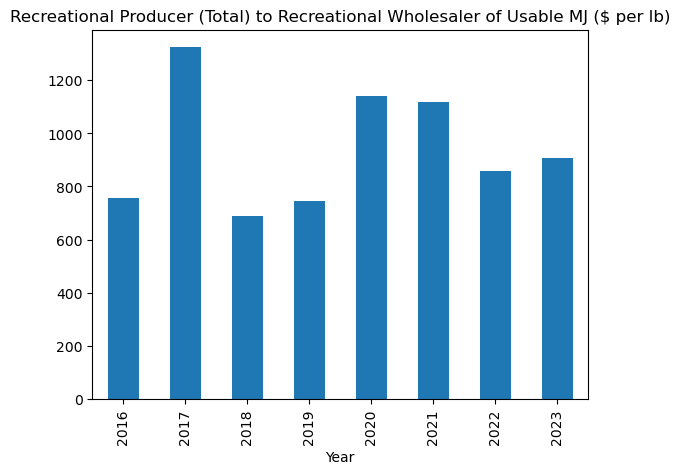

In [200]:
make_hist_year(df_fl[df_fl['ReceiverFacilityType'] == 'Recreational Wholesaler'], 'Unique Line')

Agian the prices climbs=ed in 2020 and 2021 due to covid among all producer types but indoor prices were have a stronger floor and did not crash as hard as outdoor prices afterwards. 

Again te stange behavior in the processor to wholesaler space may be an indiction of poor planing in terms of vertical integration.


### Some issues

The main issue with the dataset is that each value is a monthly median without the number of transations in that month.
That is the main issue going forward that may require attention.

Beyond that the outlook for cannabis in OR appears good Retailer prices are stable and appear to have halted their decline. Whether this has change non-wholesale pricing in the state is a potential area of future study.